<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeries_RealvsComplex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Series: Complex vs Real Coefficients
</h1></b>

Dr. Bingsen Wang

12/13/2023
</center>

#Complex Fourier Coefficiencts

A function $f(x)$ can be decomposed into Fourier series with complex Fourier coefficients
$$f(x) = \sum_{n=-\infty}^{\infty}c_ne^{jn\omega x}\tag{1}$$
where the complex coefficient is determined by
$$c_n = \frac{1}{2\pi}\int_0^{2\pi} f(x)e^{-jn\omega x}dx\tag{2}$$

It is worth noting that $f(x)$ can be a complex function although $x$ is real. If f(x) is real, then $c_n = c_{-n}^*$ with $*$ deonoting the conjugate.

#Real Fourier Coefficients

Let $f(x)$ in (1) be real function an rewrite (1) as
$$f(x) = c_0 + \sum_{n=1}^{\infty}(c_ne^{jn\omega x} +c_{-n}e^{-jn\omega x})\tag{3}$$

Based on Euler's identify
$$\begin{align}
e^{jn\omega x} &= \cos(n\omega x) + j\sin(n\omega x)\\
e^{-jn\omega x} &= \cos(n\omega x) - j\sin(n\omega x)
\end{align}\tag{4}$$

Substituting (4) into (3) yields
$$\begin{align}
f(x) &= c_0 + \sum_{n=1}^{\infty}\left\{c_n\left[\cos(n\omega x) + j\sin(n\omega x)\right] +c_{-n}\left[\cos(n\omega x) - j\sin(n\omega x)\right]\right\}\\
 &= c_0 + \sum_{n=1}^{\infty}\left[(c_n + c_{-n})\cos(n\omega x) + j(c_n - c_{-n})\sin(n\omega x) \right]
\end{align}\tag{5}$$

The Fourier series with real coefficients is commonly written as
$$\begin{align}
f(x) &= a_0 + \sum_{n=1}^{\infty}\left[a_n\cos(n\omega x) + b_n\sin(n\omega x) \right]
\end{align}\tag{6}$$
By comparison of (5) and (6), the real and complex coeffiencts are related by
$$\begin{align}
a_0 &= c_0\\
a_n &= c_n + c_{-n}\\
b_n &= j(c_n + c_{-n})
\end{align}\tag{7}$$



Substituting (2) into (7) yields
$$\begin{align}
a_0 &= \frac{1}{2\pi}\int_0^{2\pi} f(x)dx\\
a_n &= \frac{1}{\pi}\int_0^{2\pi} f(x)\cos(n\omega x)dx\\
b_n &= \frac{1}{\pi}\int_0^{2\pi} f(x)\sin(n\omega x)dx
\end{align}\tag{8}$$

#Python Code
The Python code illustrates the complex Fourier series.

1
1
3
5
7
9
1


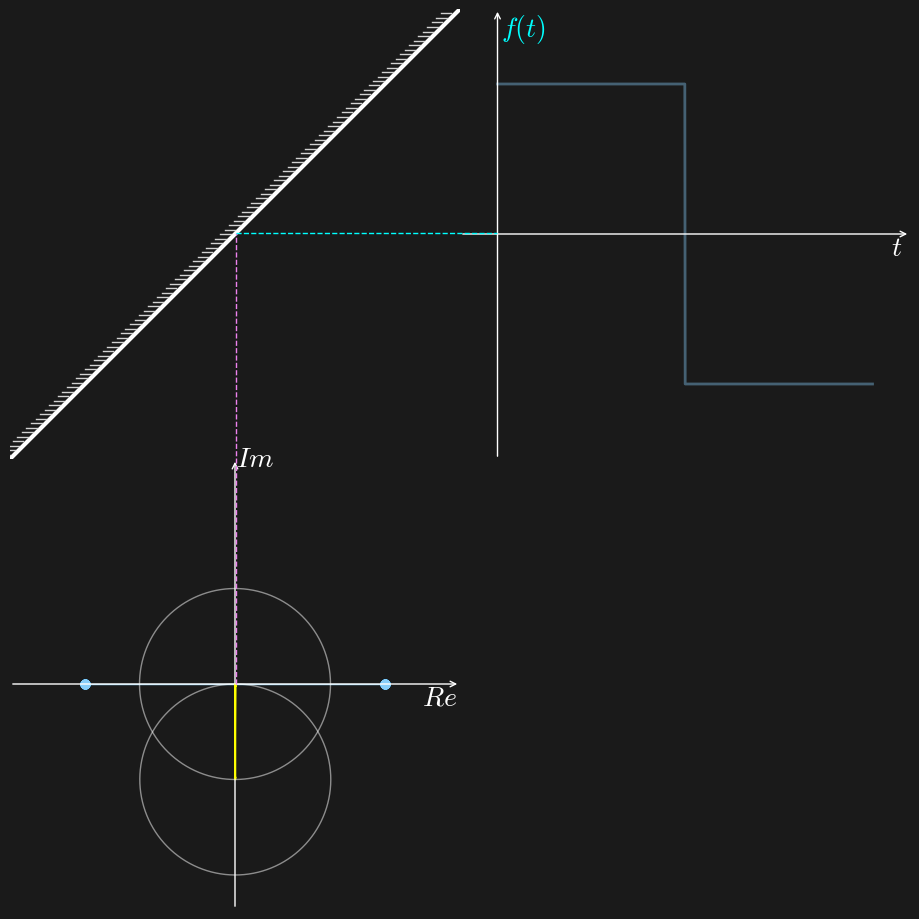

In [101]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag,heaviside,fft,array
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def rect(t): #rectagular shape: a-width, b-height, x-distance from (a-bj)
  return heaviside(cos(2*pi*t-pi*.5),0)*2-1

def fftcplx(zt):
  rt = zt.real
  it = zt.imag
  return (fft.fft(rt) + 1j*fft.fft(it))/len(zt)

def recon(zfft,t,n):
  zrec = [] #len 2n+1
  radius = [] #radius
  for i in range(n+1):
    if i==0:
      zrec.append(zfft[i]+t*0)
      radius.append(0*t)
    else:
      radius.append(zfft[i]*exp(1j*2*pi*i*t))
      radius.append(zfft[-i]*exp(-1j*2*pi*i*t))

      zrec.append(zrec[2*i-2] + radius[2*i-1])
      zrec.append(zrec[2*i-1] + radius[2*i])
  return [zrec,radius]

# draw dotted line between three points in three different plots
def l2Ax(fig,ax1,ax2,ax3,p1,p2,p3,colors):
  transFigure = fig.transFigure.inverted()
  p1_g = transFigure.transform(ax1.transData.transform(p1))
  p2_g = transFigure.transform(ax2.transData.transform(p2))
  p3_g = transFigure.transform(ax3.transData.transform(p3))
  line1 = matplotlib.lines.Line2D((p1_g[0],p2_g[0]),(p1_g[1],p2_g[1]),
                      transform=fig.transFigure,ls='--',color=colors[1], lw=1)
  line2 = matplotlib.lines.Line2D((p2_g[0],p3_g[0]),(p2_g[1],p3_g[1]),
                      transform=fig.transFigure,ls='--',color=colors[2], lw=1)
  fig.lines= [line1,line2]
  return

def vectorDraw(ax,vecs,n,nn,colors): #2*nn+1 vectors at nth instant
  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)
  ax.axis('off')
  for k in range(2*nn+1):
    if k==0:
      center = vecs[0][0][n]
      ax.arrow(0,0,center.real,center.imag,
             width = 0.002,head_width=0.01,length_includes_head=True,color=colors[4])
    else:
      center = vecs[0][k-1][n]
      ccl = vecs[1][k]
      radius = ccl[n]
      ax.arrow(center.real,center.imag,radius.real,radius.imag,
             width = 0.002,head_width=0.01,length_includes_head=True,color=colors[4])
      ax.plot(center.real+ccl.real,center.imag+ccl.imag,lw=1,color=colors[5],alpha=0.5)
  ax.plot(vecs[0][2*nn][:n].real,vecs[0][2*nn][:n].imag,lw=3,color=colors[1])

  return
#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','brown',(.1,.1,.1),'w'] #colors light bg
Nf = 256
t=linspace(0,1,1024)
traj = rect(t) #trajector on complex plane
trajfft = fftcplx(traj) #complex fft
trajrec = recon(trajfft,t,100) #reconstructed vectors, circles
fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0, .5, .5], [-1.5,1.5], [-1.5,1.5]], #complex plane
            [[0, 0, .5, .5], [-1.5,1.5], [-1.5,1.5]], #animated vectors
            [[.5, .5, .5, .5], [-.1,1.1], [-1.5,1.5]], #square wave in time
            [[0, .5, .5, .5], [-1.5,1.5], [-1.5,1.5]], #mirror
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$Im$', '$Re$'],
        ['', ''],
        ['$f(t)$', '$t$'],
        ['', ''],
        ] #variables for yx axes of each subplot

ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  if k==3:
    ax.plot([-1.5,1.5], [-1.5,1.5], color=clst[-2], lw=3)
    for i in range(100):
      ax.plot([-1.6+i*3/100, -1.53+i*3/100],[-1.5+i*3/100,-1.5+i*3/100], color='lightgray', lw=1)
  else:
    ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
    ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  if k==0:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[-2],size=20,va='center')) #y label
  else:
    ytxt_lst.append(ax.text(0.01,ym-0.02,ax_lbl[k][0],color=clst[k],size=20,va='top')) #y label
ax_lst[0].plot(traj.real,traj.imag,color=clst[0],marker='o',markersize=6, lw=1)
ax_lst[2].plot(t,traj.real,color=clst[0],lw=2,alpha=0.4)
# animation function. This is called sequentially
def animate(i):
  ii = (i%Nf)*4
  k=int(i/Nf)*2+1
  if ii==0:
    print(k)
  line_lst[2].set_data(t[:ii+1],trajrec[0][2*k][:ii+1].real)
  # line_lst[2].set_data(t,trajrec[0][2*k].real)
  vectorDraw(ax_lst[1],trajrec,ii,k,clst)
  p1 = [trajrec[0][2*k][ii].real,0]
  p2 = [trajrec[0][2*k][ii].real,trajrec[0][2*k][ii].real]
  p3 = [t[ii].real,trajrec[0][2*k][ii].real]
  l2Ax(fig,ax_lst[0],ax_lst[3],ax_lst[2],p1,p2,p3,clst)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*5, interval=200)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierSeries_RealVsComplex.mp4"
writervideo = animation.FFMpegWriter(fps=64)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# print(len(trajrec[0]))